# Práctica 4: Clasificador de Bayes
Hacemos un clasificador de bayes para poder encontrar una prostata, su halo y el fondo del ultrasonido de forma automática. 

In [50]:
# Importamos la librerias que vamos a utilzar en la práctica
import cv2
import os
import numpy as np
import math

from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join

## Carga de Imagenes
Cargamos las imagenes cortadas en tres secciones previamente:
1. Prostata: tiene la seccion del ultrasonido que tiene la prostata.
2. Halo: Carga el halo del utrasonido el cual es tejido que rodea la prostata.
3. Fondo: 

In [26]:
# Creamos tres listas en las que vamos a guardar las matrices de los ultrasonidos. 

prostatas = []
halos = []
fondos = []

mypath = (os.getcwd() + r'/imagenes/')

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# Buscamos entre las imagenes las que sean de prostata, halo o fondo y se asignan a
# la lista de imagenes a las que corresponden 

for file in onlyfiles:
    if "prost" in file:
        img = cv2.imread(mypath + file,0)
        temp = gaussian_3 = cv2.GaussianBlur(img, (9,9), 5.0)
        prostatas.append(temp)
    elif "halo" in file:
        img = cv2.imread(mypath + file,0)
        temp = gaussian_3 = cv2.GaussianBlur(img, (9,9), 5.0)
        halos.append(temp)
    elif "fondo" in file:
        img = cv2.imread(mypath + file,0)
        temp = gaussian_3 = cv2.GaussianBlur(img, (9,9), 5.0)
        fondos.append(temp)

In [27]:
def getMedian(lista):
    media_imagenes = 0
    vect_res = []
    for imagen in lista:
        alto = imagen.shape[0]
        largo = imagen.shape[1]
        vectores_imagen = []
        suma = 0
        cont = 0
        for i in range(alto):
            for j in range(largo):
                if imagen[i][j] > 0:
                    vec = []
                    suma += imagen[i][j]
                    vec.append(imagen[i][j])
                    vec.append(i)
                    vec.append(j)
                    vectores_imagen.append(vec)
                    
                    cont += 1
        media_imagenes += suma/cont
        vectores_parte.append(vectores_imagen)
        
    
    media.append(media_imagenes/len(lista))
                
    

In [28]:
media = []
vectores_parte = []

# Obtenemos la media de los grupos de imagenes. 
getMedian(prostatas)
getMedian(halos)
getMedian(fondos)

In [29]:
print("Media de Prostata: {0}\nMedia de Halo: {1}\nMedia de Fondo: {2}".format(media[0],media[1],media[2]))

Media de Prostata: 59.420810299959726
Media de Halo: 79.94311656621329
Media de Fondo: 46.00427730661914


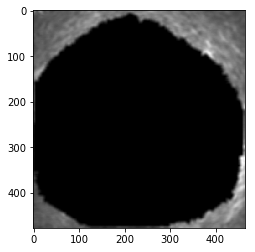

In [30]:
plt.imshow(fondos[2], cmap='gray')
plt.show()

## Covarianza Prostata

In [35]:
prostata_list = []

for i in range(3):
    for vector in vectores_parte[i]:
        prostata_list.append(vector)

In [38]:
print("Covarianza Prostata")
cov_pros = np.cov(prostata_list, rowvar=False)
cov_pros

Covarianza Prostata


array([[  711.74618757,   625.43033581,   172.2415675 ],
       [  625.43033581,  3922.00506736,   618.94488601],
       [  172.2415675 ,   618.94488601,  4159.39683926]])

## Covarianza Halo

In [39]:
halo_list = []

for i in range(3,6):
    for value in vectores_parte[i]:
        halo_list.append(value)

In [40]:
print("Covarianza Halo")
cov_halo = np.cov(halo_list, rowvar=False)
cov_halo

Covarianza Halo


array([[  1339.03836156,    712.77103051,    579.75435398],
       [   712.77103051,  18561.04281938,    208.85218909],
       [   579.75435398,    208.85218909,  18349.40050211]])

## Covarianza Fondo

In [43]:
fondo_list = []

for i in range(6,9):
    for value in vectores_parte[i]:
        fondo_list.append(value)

In [44]:
print("Covarianza Fondo")
cov_fondo = np.cov(fondo_list, rowvar=False)
cov_fondo

Covarianza Fondo


array([[   463.47726764,    106.95255159,    407.98453949],
       [   106.95255159,  29937.61629339,   -695.53287608],
       [   407.98453949,   -695.53287608,  27517.86297231]])

In [51]:
logetP = (1/2)*math.log(np.linalg.det(cov_pros))
logetH = (1/2)*math.log(np.linalg.det(cov_halo))
logetF = (1/2)*math.log(np.linalg.det(cov_fondo))

In [52]:
invcovP = np.linalg.inv(cov_pros)
invcovH = np.linalg.inv(cov_halo)
invcovF = np.linalg.inv(cov_fondo)

In [75]:
prostatas_array = []
halos_array = []
fondos_array = []

for img in prostatas:
    for filas in img:
        for pixel in filas:
            prostatas_array.append(pixel)
        
for img in halos:
    for filas in img:
        for pixel in filas:
            halos_array.append(pixel)

for img in fondos:
    for filas in img:
        for pixel in filas:
            fondos_array.append(pixel)


In [79]:
probP = np.count_nonzero(prostatas_array)/pixeles_pros
probH = np.count_nonzero(halos_array)/pixeles_halo
probF = np.count_nonzero(fondos_array)/pixeles_fondo

In [80]:
print(probF)
print(probH)
print(probP)

0.32311311513456326
0.7121512813255758
0.6533212560386473


In [ ]:
def fit_tranform(imagen):
    imagen[15:460][86:531]
    YP = -(1/2) * (imagen - media[0]).transpose() * invcovP * (imagen - media[0]) - logetP + np.log(probP)

In [ ]:
imagen = cv2.imread(mypath + '<Nombre_Archivo>',0)
fit_transform(imagen)